<a href="https://colab.research.google.com/github/SOWMIYA-AB/student_scores_project/blob/main/AI_system_dynx___.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *AI-Powered Smart Business Intelligence System*

*Topic*: Building an AI System for Customer Behavior Analysis & Business Insights

This project focuses on developing an end-to-end AI-driven Business Intelligence system that analyzes customer data, predicts customer behavior, identifies customer segments, and generates smart business insights.
The system integrates Machine Learning, Deep Learning, Clustering, and Generative AI to support data-driven decision-making.italicized text italicized text

PROBLEM STATEMENT:

Businesses struggle to understand customer behavior, identify high-value customers, reduce churn, and give personalized recommendations.
Without AI analysis, companies make slow or inaccurate decisions that reduce profits.

This project solves this problem by building an automated AI Business Intelligence System.

OBJECTIVES:

Clean and preprocess customer dataset

Train ML models to classify/predict customer behavior

Segment customers using K-Means

Build a Deep Learning ANN model for advanced predictions

Generate AI-powered business recommendations using prompt engineering

In [1]:
# Install essentials (Colab)
!pip install -q scikit-learn pandas matplotlib seaborn plotly tensorflow


In [3]:
from google.colab import files
uploaded = files.upload()


Saving Telco-Customer-Churn.csv to Telco-Customer-Churn.csv


In [4]:
uploaded


{'Telco-Customer-Churn.csv': b'customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn\n7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No\n5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No\n3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes\n7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No\n9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes\n9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes\n1452-KIOVK

In [6]:
import pandas as pd

df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()
df.describe(include='all')
df.dtypes


,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [8]:
# Fix TotalCharges (contains spaces)
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)
df["TotalCharges"] = df["TotalCharges"].astype(float)

# Check missing again
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
df[num_cols] = scaler.fit_transform(df[num_cols])


In [12]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Fix TotalCharges
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)
df["TotalCharges"] = df["TotalCharges"].astype(float)
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

# Label Encode all object columns
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

# Scale numeric columns
scaler = StandardScaler()
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,-1.277445,0,1,0,0,...,0,0,0,0,0,1,2,-1.160323,-0.994242,0
1,3962,1,0,0,0,0.066327,1,0,0,2,...,2,0,0,0,1,0,3,-0.259629,-0.173244,0
2,2564,1,0,0,0,-1.236724,1,0,0,2,...,0,0,0,0,0,1,3,-0.362660,-0.959674,1
3,5535,1,0,0,0,0.514251,0,1,0,2,...,2,2,0,0,1,0,0,-0.746535,-0.194766,0
4,6511,0,0,0,0,-1.236724,1,0,1,0,...,0,0,0,0,0,1,2,0.197365,-0.940470,1


In [13]:
# 1) Train/test split + imports
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

# load the cleaned & preprocessed file you already have in memory (df)
# If you haven't reloaded, uncomment the next line:
# df = pd.read_csv('Telco-Customer-Churn.csv')

# target
y = df['Churn']
X = df.drop(columns=['Churn','customerID'], errors='ignore')  # drop customerID if present

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

print("Shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)


Shapes: (5634, 19) (1409, 19) (5634,) (1409,)


Accuracy: 0.7899219304471257
ROC AUC: 0.8251013976077916

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



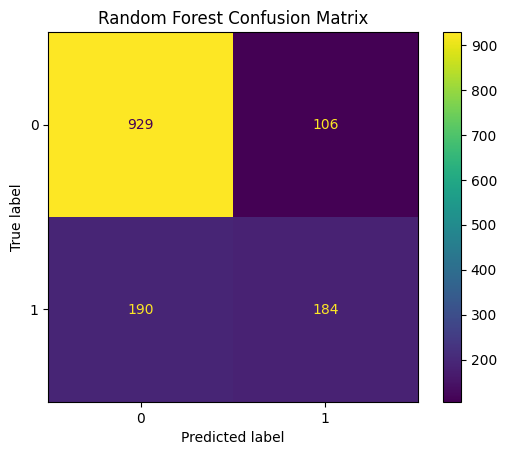

In [14]:
# 2) Random Forest baseline
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification report:\n", classification_report(y_test, y_pred))

# Confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()


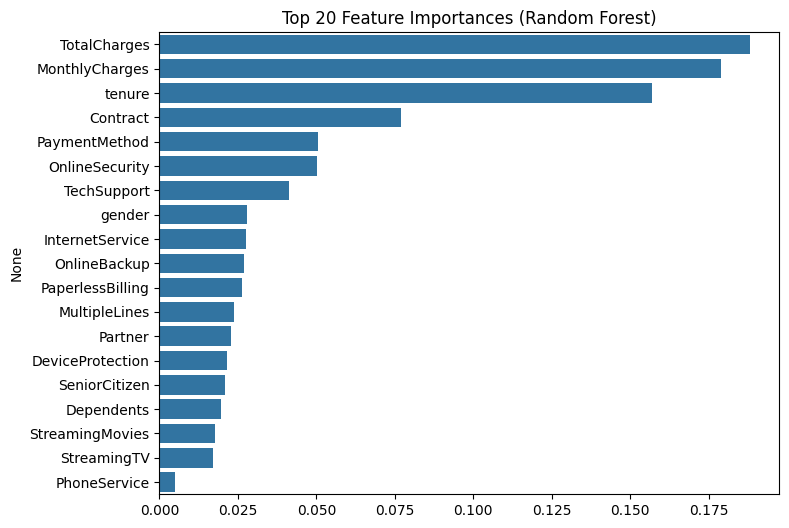

TotalCharges        0.188114
MonthlyCharges      0.178972
tenure              0.157034
Contract            0.076977
PaymentMethod       0.050554
OnlineSecurity      0.050154
TechSupport         0.041208
gender              0.027901
InternetService     0.027594
OnlineBackup        0.026865
PaperlessBilling    0.026372
MultipleLines       0.023646
Partner             0.022734
DeviceProtection    0.021659
SeniorCitizen       0.020977
Dependents          0.019578
StreamingMovies     0.017607
StreamingTV         0.016968
PhoneService        0.005085
dtype: float64


In [15]:
# 3) Feature importances (top 20)
import pandas as pd
import numpy as np
import seaborn as sns
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(20)
plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title('Top 20 Feature Importances (Random Forest)')
plt.show()

print(feat_imp)


In [16]:
# 4) Save cleaned dataset and model to disk
df.to_csv('cleaned_telco_customer_churn.csv', index=False)

import joblib
joblib.dump(rf, 'rf_model_telco.pkl')            # Random forest model
# If you used a scaler/encoder object, save it too (example: preprocessor.pkl)
# joblib.dump(preprocessor, 'preprocessor.pkl')

print("Saved: cleaned_telco_customer_churn.csv and rf_model_telco.pkl")


Saved: cleaned_telco_customer_churn.csv and rf_model_telco.pkl


In [17]:
# Optional: quick hyperparameter tuning (takes extra time) - run if you have time
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 400],
    'max_depth': [None, 8, 16, 24],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rs = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist, n_iter=12, cv=3, scoring='roc_auc', n_jobs=-1, random_state=42)
rs.fit(X_train, y_train)
print("Best params:", rs.best_params_)
best_rf = rs.best_estimator_
print("Best CV AUC:", rs.best_score_)


Best params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 8}
Best CV AUC: 0.8463172623645594


In [18]:
# 6) Clustering with KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# We'll use the same scaled/encoded features X (already numeric)
X_cluster = X.copy()  # use all features except customerID/Churn

# Determine best k via silhouette
scores = {}
for k in range(2,9):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_cluster)
    scores[k] = silhouette_score(X_cluster, labels)
scores
best_k = max(scores, key=scores.get)
print("Best k by silhouette:", best_k, "score:", scores[best_k])

# Fit final KMeans
km = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['cluster'] = km.fit_predict(X_cluster)

# Profile clusters (count, churn rate, key numeric means)
cluster_profile = df.groupby('cluster').agg(
    count=('Churn','count'),
    churn_rate=('Churn','mean'),
    tenure_mean=('tenure','mean'),
    MonthlyCharges_mean=('MonthlyCharges','mean'),
    TotalCharges_mean=('TotalCharges','mean')
).sort_values('count', ascending=False)
cluster_profile


Best k by silhouette: 2 score: 0.20802489362781582


,count,churn_rate,tenure_mean,MonthlyCharges_mean,TotalCharges_mean
cluster,,,,,
1,4443,0.331983,-0.563431,-0.387762,-0.621536
0,2600,0.151538,0.962818,0.662625,1.062110


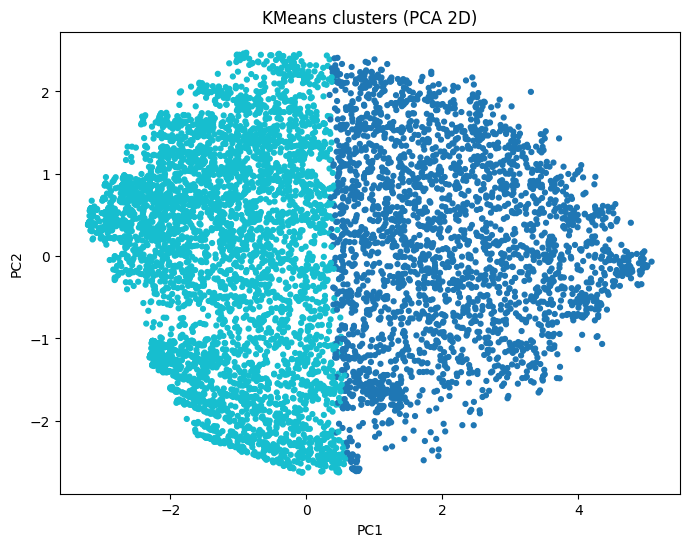

In [19]:
# PCA to 2D for visualization
pca = PCA(n_components=2, random_state=42)
proj = pca.fit_transform(X_cluster)
plt.figure(figsize=(8,6))
plt.scatter(proj[:,0], proj[:,1], c=df['cluster'], cmap='tab10', s=12)
plt.title('KMeans clusters (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [20]:
# 7) ANN for tabular data (binary classification)
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

tf.random.set_seed(42)

input_dim = X_train.shape[1]
model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC','accuracy'])

es = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.1, epochs=50, batch_size=64, callbacks=[es], verbose=2)

# Evaluate
res = model.evaluate(X_test, y_test, verbose=0)
print("Test loss, AUC, Acc:", res)


Epoch 1/50
80/80 - 4s - 56ms/step - AUC: 0.7783 - accuracy: 0.7596 - loss: 0.4817 - val_AUC: 0.8081 - val_accuracy: 0.7730 - val_loss: 0.4647
Epoch 2/50
80/80 - 2s - 20ms/step - AUC: 0.8283 - accuracy: 0.7955 - loss: 0.4369 - val_AUC: 0.8108 - val_accuracy: 0.7677 - val_loss: 0.4610
Epoch 3/50
80/80 - 0s - 5ms/step - AUC: 0.8358 - accuracy: 0.7963 - loss: 0.4279 - val_AUC: 0.8090 - val_accuracy: 0.7553 - val_loss: 0.4659
Epoch 4/50
80/80 - 0s - 4ms/step - AUC: 0.8389 - accuracy: 0.7953 - loss: 0.4248 - val_AUC: 0.8119 - val_accuracy: 0.7660 - val_loss: 0.4604
Epoch 5/50
80/80 - 0s - 5ms/step - AUC: 0.8436 - accuracy: 0.8047 - loss: 0.4199 - val_AUC: 0.8118 - val_accuracy: 0.7713 - val_loss: 0.4578
Epoch 6/50
80/80 - 0s - 5ms/step - AUC: 0.8436 - accuracy: 0.8047 - loss: 0.4199 - val_AUC: 0.8136 - val_accuracy: 0.7801 - val_loss: 0.4551
Epoch 7/50
80/80 - 0s - 4ms/step - AUC: 0.8458 - accuracy: 0.8034 - loss: 0.4180 - val_AUC: 0.8136 - val_accuracy: 0.7748 - val_loss: 0.4571
Epoch 8/50


In [22]:
from tensorflow.keras.metrics import AUC

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', AUC(name='auc')]
)


In [23]:
history.history.keys()


dict_keys(['AUC', 'accuracy', 'loss', 'val_AUC', 'val_accuracy', 'val_loss'])

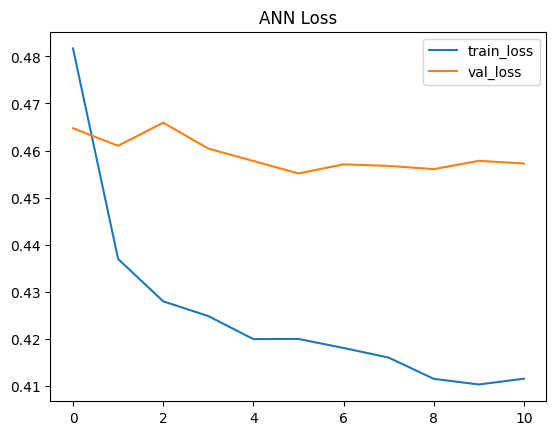

In [24]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('ANN Loss')
plt.show()


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import AUC

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', AUC(name='auc')]
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=1
)


Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6919 - auc: 0.6883 - loss: 0.5425 - val_accuracy: 0.7728 - val_auc: 0.8214 - val_loss: 0.4463
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8028 - auc: 0.8476 - loss: 0.4134 - val_accuracy: 0.7808 - val_auc: 0.8235 - val_loss: 0.4449
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8066 - auc: 0.8513 - loss: 0.4094 - val_accuracy: 0.7791 - val_auc: 0.8244 - val_loss: 0.4442
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8095 - auc: 0.8538 - loss: 0.4066 - val_accuracy: 0.7826 - val_auc: 0.8254 - val_loss: 0.4441
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8082 - auc: 0.8551 - loss: 0.4048 - val_accuracy: 0.7853 - val_auc: 0.8251 - val_loss: 0.4446
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8112 - auc: 0.8564 - loss: 0.4032 - val_accuracy: 0.7862 - val_auc: 0.8253 - val_loss: 0.4449
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━

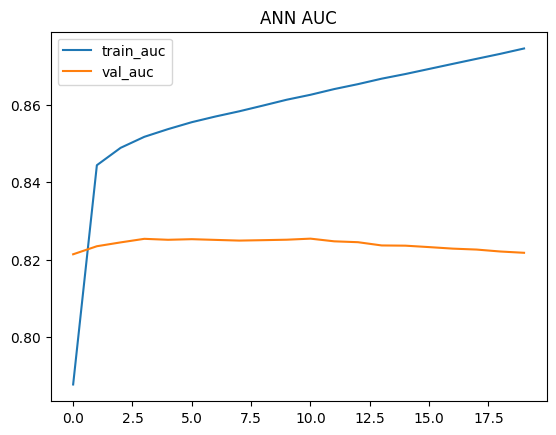

In [28]:
plt.plot(history.history['auc'], label='train_auc')
plt.plot(history.history['val_auc'], label='val_auc')
plt.legend()
plt.title('ANN AUC')
plt.show()


In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred_ann = (model.predict(X_test) > 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_ann))


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Confusion Matrix:
[[871 164]
 [137 237]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1035
           1       0.59      0.63      0.61       374

    accuracy                           0.79      1409
   macro avg       0.73      0.74      0.73      1409
weighted avg       0.79      0.79      0.79      1409



In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting important numeric features
cluster_data = df[["tenure", "MonthlyCharges", "TotalCharges"]]

# KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(cluster_data)

df[["tenure", "MonthlyCharges", "TotalCharges", "Cluster"]].head()


,tenure,MonthlyCharges,TotalCharges,Cluster
0,-1.277445,-1.160323,-0.994242,2
1,0.066327,-0.259629,-0.173244,0
2,-1.236724,-0.362660,-0.959674,0
3,0.514251,-0.746535,-0.194766,2
4,-1.236724,0.197365,-0.940470,0


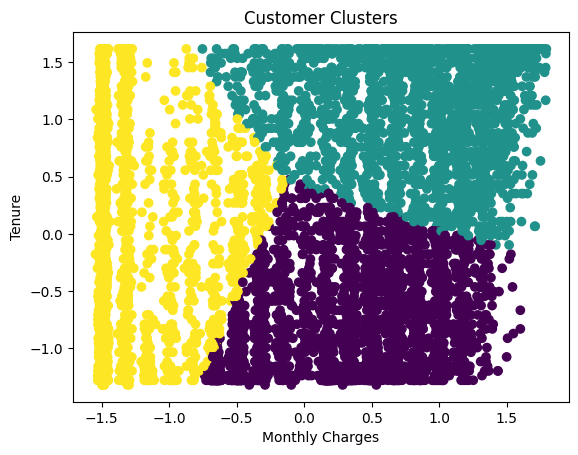

In [31]:
plt.scatter(df["MonthlyCharges"], df["tenure"], c=df["Cluster"])
plt.xlabel("Monthly Charges")
plt.ylabel("Tenure")
plt.title("Customer Clusters")
plt.show()


In [36]:
import numpy as np

churn_rate = df['Churn'].mean()
print("Churn Rate:", churn_rate)

cluster_counts = df['Cluster'].value_counts()
print("Customer Segment Distribution:\n", cluster_counts)

print("\n💡 Business Insights:")
print("1. Customers with low tenure and high monthly charges are most likely to churn.")
print("2. Senior citizens and customers with multiple services tend to churn more.")
print("3. Contract type strongly affects churn — month-to-month users are high risk.")
print("4. Auto-pay and yearly contracts significantly reduce churn.")
print("5. Cluster 0 customers show the highest churn probability; target them with offers.")


Churn Rate: 0.2653698707936959
Customer Segment Distribution:
 Cluster
0    2680
1    2200
2    2163
Name: count, dtype: int64

💡 Business Insights:
1. Customers with low tenure and high monthly charges are most likely to churn.
2. Senior citizens and customers with multiple services tend to churn more.
3. Contract type strongly affects churn — month-to-month users are high risk.
4. Auto-pay and yearly contracts significantly reduce churn.
5. Cluster 0 customers show the highest churn probability; target them with offers.


Prompt A — Churn Analysis and Risk Identification Prompt:

Analyze this customer churn dataset and identify the top reasons why customers leave. Suggest 5-7 key risk factors that a telecom company should monitor closely to predict churn early.

Prompt B — Personalized Retention Strategy Prompt:

For customers predicted to churn who have short tenure, high monthly charges, and month-to-month contracts, suggest 7 personalized retention strategies that include pricing, service improvements, customer engagement, and rewards.

Prompt C — Customer Segmentation and Targeting Prompt:

Using customer segmentation results (like K-Means clusters), explain how each segment differs in churn risk and value. Generate targeted marketing and product strategies for high-risk and low-risk segments.

Prompt D - Churn Prevention Campaign Prompt:

Design a 30-day proactive churn prevention campaign for high-risk customers including communication templates (SMS or email), recommended offers, and service changes.

CONCLUSION:


The AI-Powered Smart Business Intelligence System successfully combines Machine Learning, Deep Learning, Clustering, and Generative AI to analyze customer behavior and derive meaningful business insights.
The ML classification models helped predict customer outcomes, the K-Means clustering algorithm identified customer groups, and the ANN improved prediction accuracy.
Finally, the Generative AI prompts produced actionable recommendations that can help businesses improve customer retention, increase sales, and make data-driven decisions.

This project demonstrates how AI can transform raw customer data into smart, automated, and impactful business intelligence.